In [1]:
from kymata.datasets.sample import KymataMirror2023Q3Dataset, TVLDeltaInsTC1LoudnessOnlySensorsDataset
from kymata.entities.expression import HexelExpressionSet, SensorExpressionSet
from kymata.plot.color import gradient_color_dict, constant_color_dict
from kymata.plot.plot import expression_plot, lengend_display_dict

### Plot Hexel Expression Plots

In [2]:
# We'll create new expression set object and add to it

# For more explanation of saving and loading ExpressionSets, see the demo_save_load.ipynb
expression_data_kymata_mirror: HexelExpressionSet = KymataMirror2023Q3Dataset().to_expressionset()

# print the names of all available functions in the expressionSet object
print("\n".join(expression_data_kymata_mirror.functions))

Data root set at /Users/cai/Dox/Work/Kymata lab/Code/kymata-toolbox/kymata-toolbox-data.
Consider setting this as environmental variable KYMATA_DATA_ROOT to ensure it's reused next time.
Hint: $> KYMATA_DATA_ROOT="/Users/cai/Dox/Work/Kymata lab/Code/kymata-toolbox/kymata-toolbox-data"
Local file already exists: /Users/cai/Dox/Work/Kymata lab/Code/kymata-toolbox/kymata-toolbox-data/tutorial_nkg_data/kymata_mirror_Q3_2023/kymata_mirror_Q3_2023_expression_endtable.nkg


/Users/cai/Dox/Work/Kymata lab/Code/kymata-toolbox/kymata/io/nkg.py:144: UserWarning: This file uses an old format. Please consider re-saving the data to avoid future incompatibility.
  warn("This file uses an old format. Please consider re-saving the data to avoid future incompatibility.")


vertical displacement (RH-Th/P/M)
vertical displacement (RH-Ha/P/M)
vertical displacement (LH-Th/P/M)
vertical displacement (LH-Ha/P/M)
vibration detection (RH-Th/P/M)
vibration detection (LH-Th/P/M)
vibration detection (LH-Ha/P/M)
vibration detection (RH-Ha/P/M)
CIECAM02 A
CIECAM02 a
CIELAB a*
CIELAB L
Heeger horizontal position
Heeger horizontal velocity
Heeger horizontal acceleration
Heeger horizontal ME GP1
Heeger horizontal ME GP2
Heeger horizontal ME GP3
Heeger horizontal ME GP4
Horn-Schunck Horizontal Velocity
Horn-Schunck Horizontal Displacement
Horn-Schunck Horizontal Acceleration
Hilbert envelope
TVL loudness (short-term)
TVL loudness (instantaneous)
TVL loudness chan 1 (instantaneous)
TVL loudness chan 2 (instantaneous)
TVL loudness chan 3 (instantaneous)
TVL loudness chan 4 (instantaneous)
TVL loudness chan 5 (instantaneous)
TVL loudness chan 6 (instantaneous)
TVL loudness chan 7 (instantaneous)
TVL loudness chan 8 (instantaneous)
TVL loudness chan 9 (instantaneous)
TVL lou

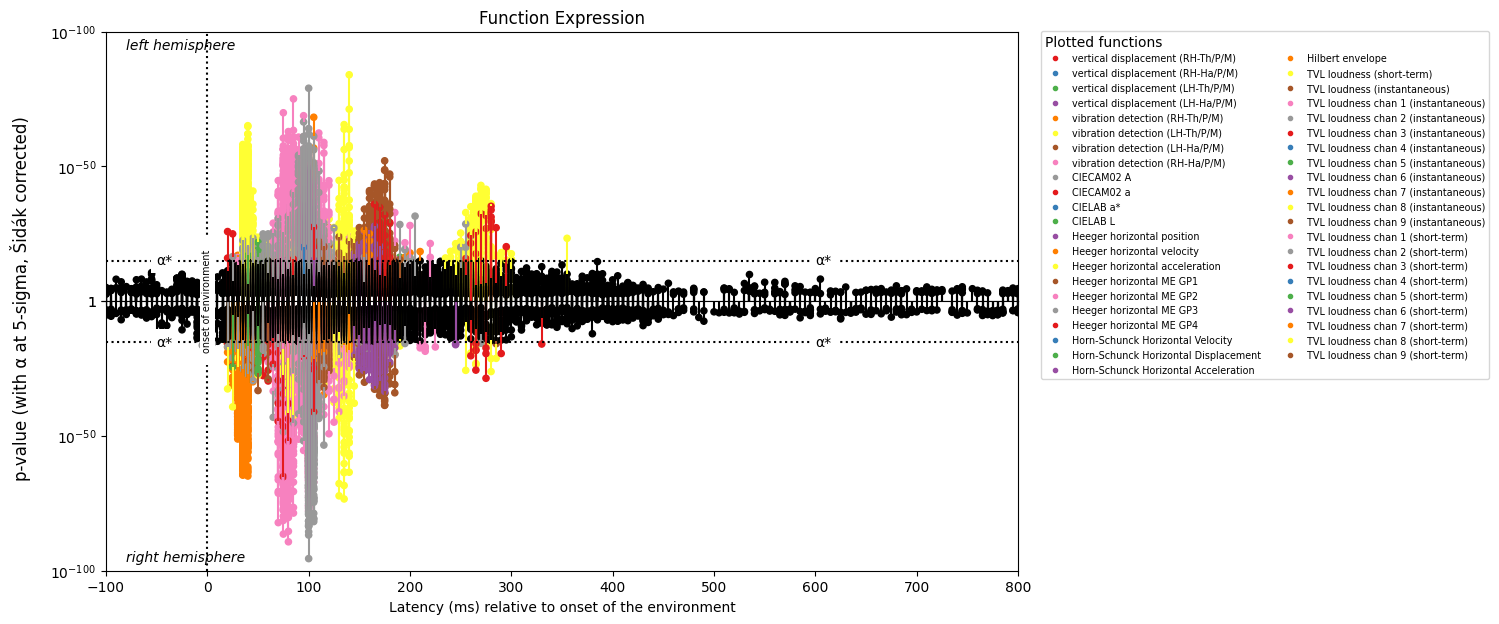

In [3]:
# plot everything, with everything model selected against each other
expression_plot(expression_data_kymata_mirror)

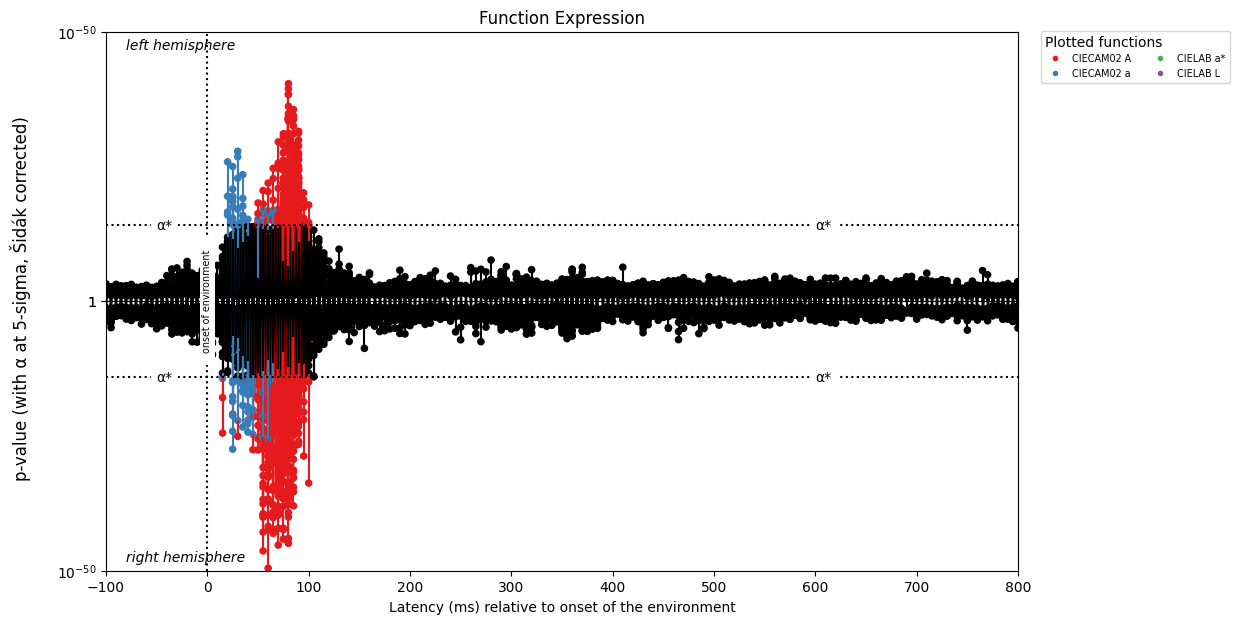

In [4]:
# only compare a subset of functions (e.g. colour functions), and print them all.
# Note that 'CIELAB a*' and 'CIELAB L' are not significant, and so will not turn up.
expression_plot(expression_data_kymata_mirror[
                    'CIECAM02 A',
                    'CIECAM02 a',
                    'CIELAB a*',
                    'CIELAB L'
                ])

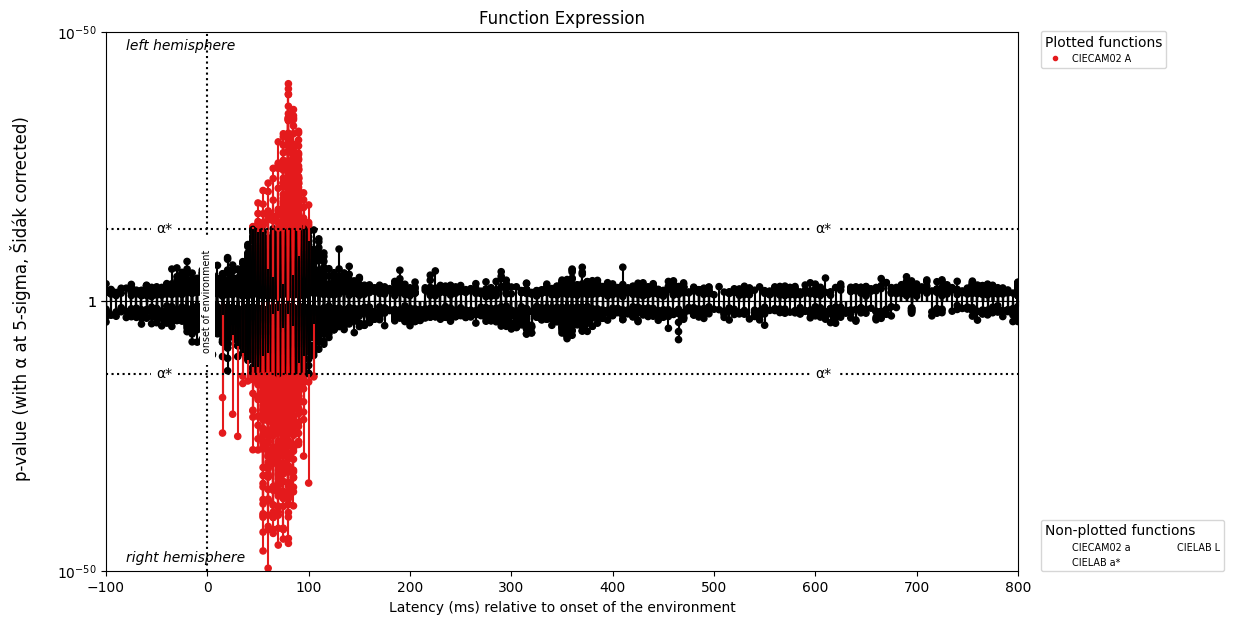

In [5]:
# Only compare a subset of functions, and print just one of them
expression_plot(expression_data_kymata_mirror[
                    'CIECAM02 A',
                    'CIECAM02 a',
                    'CIELAB a*',
                    'CIELAB L'
                ], show_only=[
                    "CIECAM02 A"
                ])

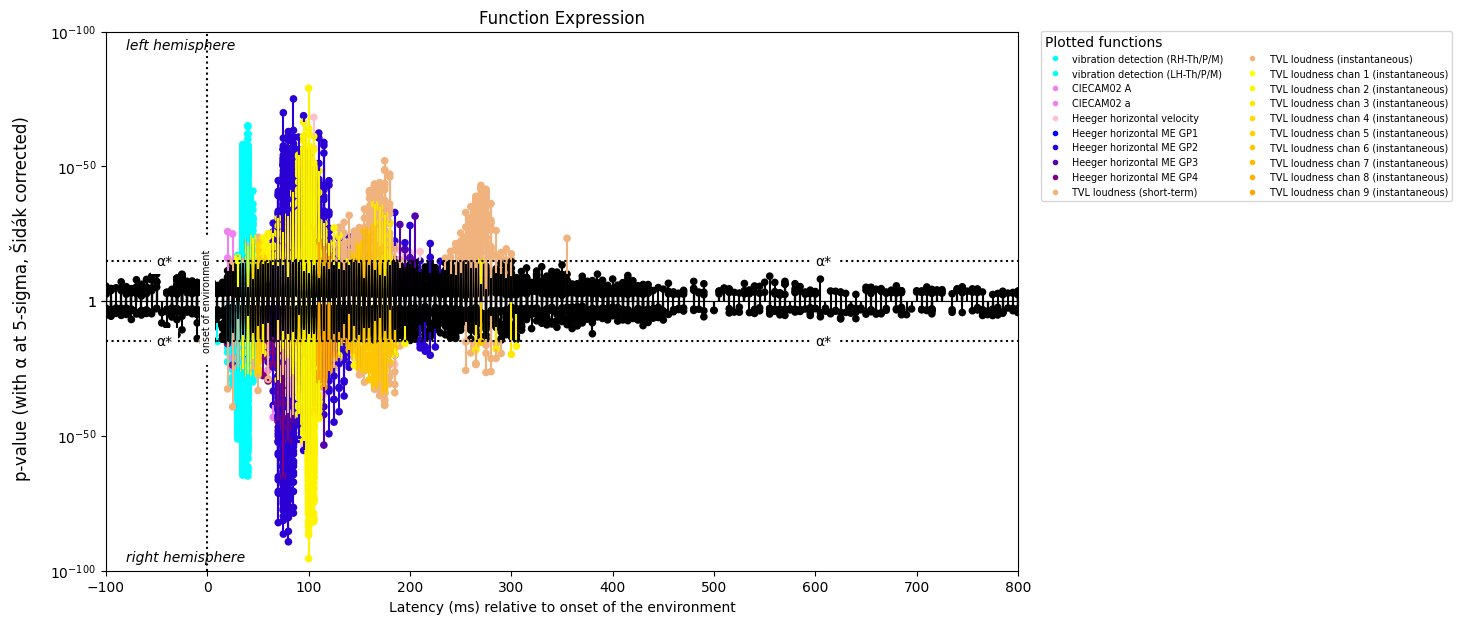

In [6]:
# Override colours (using hexcodes) so that all touch are cyan, all hearing orange, and all visual purple
expression_plot(expression_data_kymata_mirror[
                    'vibration detection (RH-Th/P/M)',
                    'vibration detection (LH-Th/P/M)',
                    'CIECAM02 A',
                    'CIECAM02 a',
                    'Heeger horizontal velocity',
                    'Heeger horizontal ME GP1',
                    'Heeger horizontal ME GP2',
                    'Heeger horizontal ME GP3',
                    'Heeger horizontal ME GP4',
                    'TVL loudness (short-term)', 
                    'TVL loudness (instantaneous)', 
                    'TVL loudness chan 1 (instantaneous)', 
                    'TVL loudness chan 2 (instantaneous)', 
                    'TVL loudness chan 3 (instantaneous)', 
                    'TVL loudness chan 4 (instantaneous)', 
                    'TVL loudness chan 5 (instantaneous)', 
                    'TVL loudness chan 6 (instantaneous)', 
                    'TVL loudness chan 7 (instantaneous)',
                    'TVL loudness chan 8 (instantaneous)',
                    'TVL loudness chan 9 (instantaneous)',
                ],
                # Supply colours in a dictionary mapping function names to colour hexes.
                # You can use the two helper functions constant_color_dict and gradient_color_dict to visually group functions belonging
                # to the same family.  For example, here we set both vibration functions to be cyan
                color = constant_color_dict([
                            'vibration detection (RH-Th/P/M)',
                            'vibration detection (LH-Th/P/M)',
                        ], color="cyan")
                        | constant_color_dict([
                            'CIECAM02 A',
                            'CIECAM02 a',
                        ], color="violet")
                        | {
                            'Heeger horizontal velocity': 'pink',
                        }
                        # and here we plot the 4 consecutive layers of a Gaussian pyramid using a colour gradient
                        | gradient_color_dict([
                            'Heeger horizontal ME GP1',
                            'Heeger horizontal ME GP2',
                            'Heeger horizontal ME GP3',
                            'Heeger horizontal ME GP4',
                        ], start_color="blue", stop_color="purple")
                        | {
                            'TVL loudness (short-term)': '#f1b37e',
                            'TVL loudness (instantaneous)': '#f1b37e',
                        }
                        | gradient_color_dict([
                            'TVL loudness chan 1 (instantaneous)',
                            'TVL loudness chan 2 (instantaneous)',
                            'TVL loudness chan 3 (instantaneous)',
                            'TVL loudness chan 4 (instantaneous)',
                            'TVL loudness chan 5 (instantaneous)',
                            'TVL loudness chan 6 (instantaneous)',
                            'TVL loudness chan 7 (instantaneous)',
                            'TVL loudness chan 8 (instantaneous)',
                            'TVL loudness chan 9 (instantaneous)',
                        ], start_color="yellow", stop_color="orange"))

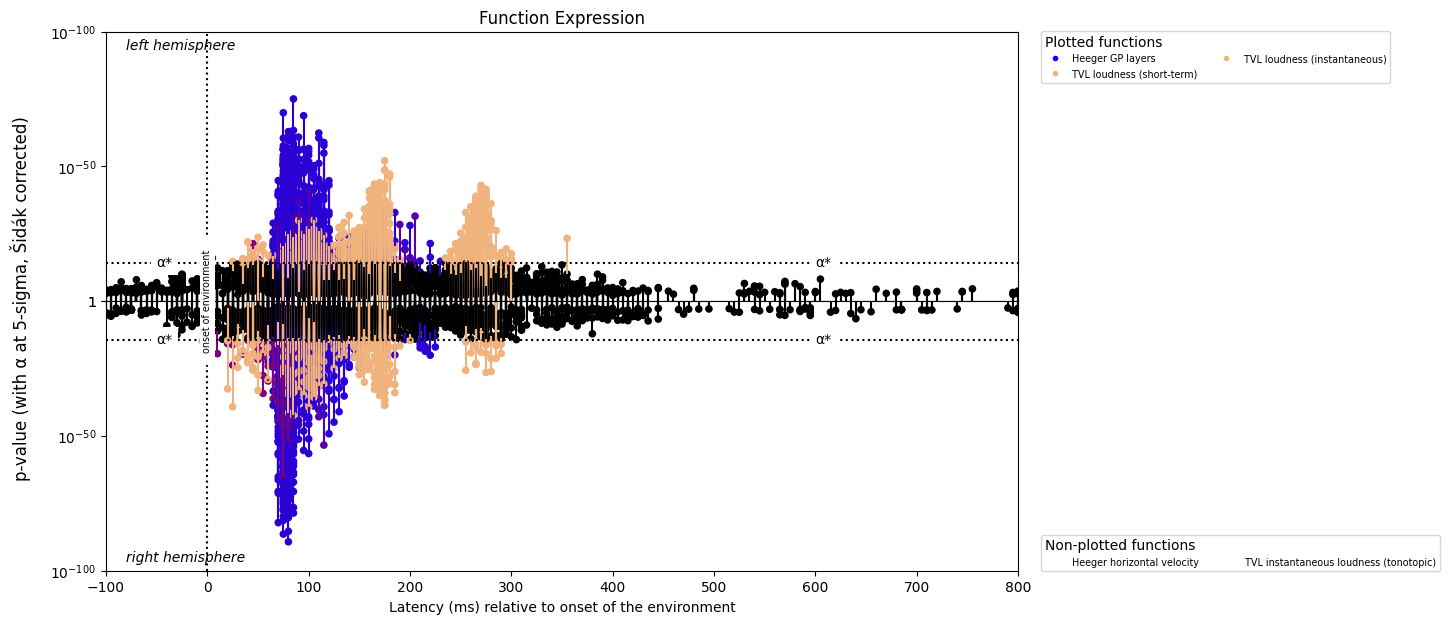

In [7]:
# We can group multiple functions into single entries in the legend
heeger_gp_layers = [
    'Heeger horizontal ME GP1',
    'Heeger horizontal ME GP2',
    'Heeger horizontal ME GP3',
    'Heeger horizontal ME GP4',
]
tvl_tonotopic_layers = [
    'TVL loudness chan 1 (instantaneous)', 
    'TVL loudness chan 2 (instantaneous)', 
    'TVL loudness chan 3 (instantaneous)', 
    'TVL loudness chan 4 (instantaneous)', 
    'TVL loudness chan 5 (instantaneous)', 
    'TVL loudness chan 6 (instantaneous)', 
    'TVL loudness chan 7 (instantaneous)',
    'TVL loudness chan 8 (instantaneous)',
    'TVL loudness chan 9 (instantaneous)',
]
expression_plot(expression_data_kymata_mirror[
                    'Heeger horizontal velocity',
                    'Heeger horizontal ME GP1',
                    'Heeger horizontal ME GP2',
                    'Heeger horizontal ME GP3',
                    'Heeger horizontal ME GP4',
                    'TVL loudness (short-term)', 
                    'TVL loudness (instantaneous)', 
                    'TVL loudness chan 1 (instantaneous)', 
                    'TVL loudness chan 2 (instantaneous)', 
                    'TVL loudness chan 3 (instantaneous)', 
                    'TVL loudness chan 4 (instantaneous)', 
                    'TVL loudness chan 5 (instantaneous)', 
                    'TVL loudness chan 6 (instantaneous)', 
                    'TVL loudness chan 7 (instantaneous)',
                    'TVL loudness chan 8 (instantaneous)',
                    'TVL loudness chan 9 (instantaneous)',
                ],
                show_only=heeger_gp_layers + ['TVL loudness (short-term)', 'TVL loudness (instantaneous)'],
                color = gradient_color_dict(heeger_gp_layers, start_color="blue", stop_color="purple")
                        | {
                            'TVL loudness (short-term)': '#f1b37e',
                            'TVL loudness (instantaneous)': '#f1b37e',
                        },
                legend_display=lengend_display_dict(heeger_gp_layers, "Heeger GP layers")
                               | lengend_display_dict(tvl_tonotopic_layers, "TVL instantaneous loudness (tonotopic)"))

### Plot sensor expression plots

Data root set at /Users/cai/Dox/Work/Kymata lab/Code/kymata-toolbox/kymata-toolbox-data.
Consider setting this as environmental variable KYMATA_DATA_ROOT to ensure it's reused next time.
Hint: $> KYMATA_DATA_ROOT="/Users/cai/Dox/Work/Kymata lab/Code/kymata-toolbox/kymata-toolbox-data"
Local file already exists: /Users/cai/Dox/Work/Kymata lab/Code/kymata-toolbox/kymata-toolbox-data/tutorial_nkg_data/TVL_2020_delta_ins_tontop_chan1_loudness_only_sensors/TVL_2020_delta_ins_tontop_chan1_loudness_only_sensors.nkg


/Users/cai/Dox/Work/Kymata lab/Code/kymata-toolbox/kymata/io/nkg.py:144: UserWarning: This file uses an old format. Please consider re-saving the data to avoid future incompatibility.
  warn("This file uses an old format. Please consider re-saving the data to avoid future incompatibility.")


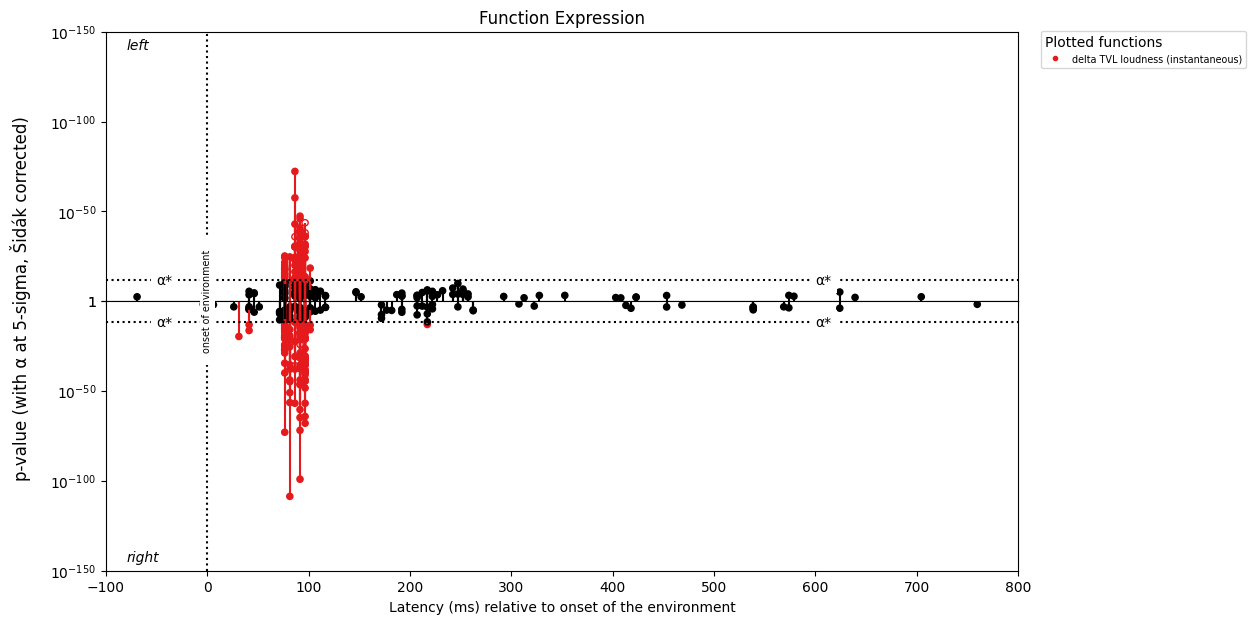

In [8]:
expression_data_TVL_ins_loudness_TC1_sensors: SensorExpressionSet = TVLDeltaInsTC1LoudnessOnlySensorsDataset().to_expressionset()
expression_plot(expression_data_TVL_ins_loudness_TC1_sensors)

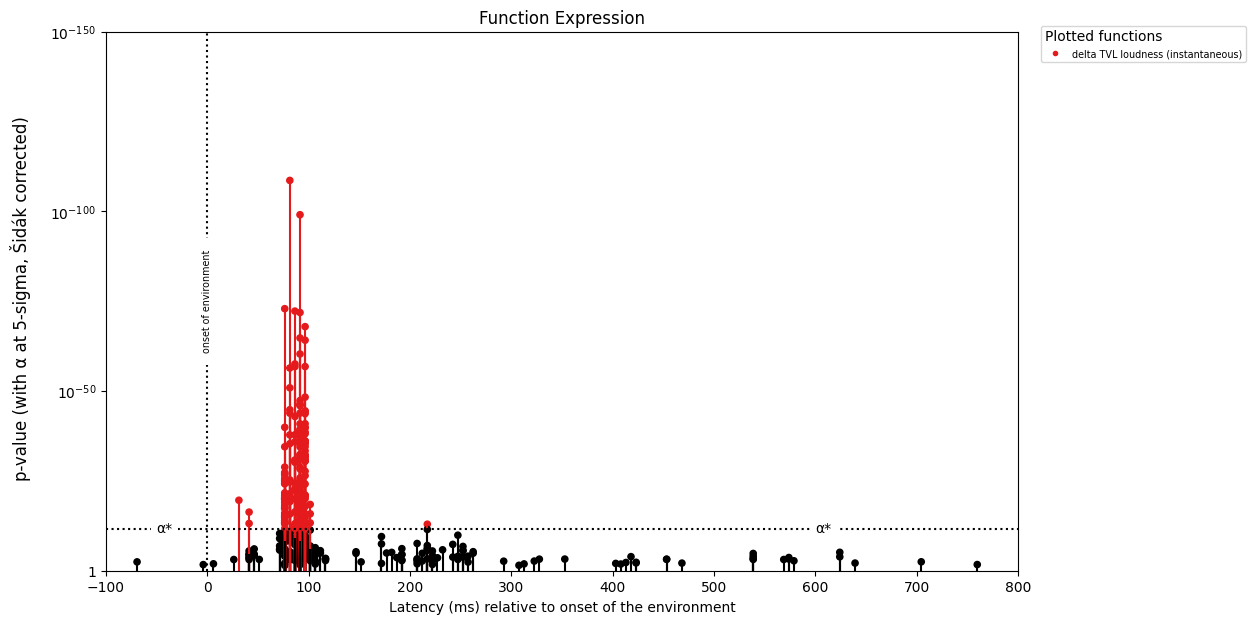

In [9]:
# With sensor data we can also plot all sensors pointing in the same direction if we don't wish to
# distinguish between left and right sensors
expression_plot(expression_data_TVL_ins_loudness_TC1_sensors, paired_axes=False)